## The Android App Market on Google Play





## Project Description

Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this project, you will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. You'll look for insights in the data to devise strategies to drive growth and retention. The data for this project was scraped from the Google Play website. While there are many popular datasets for Apple App Store, there aren't many for Google Play apps, which is partially due to the increased difficulty in scraping the latter as compared to the former. The data files are as follows:

    apps.csv : contains all the details of the apps on Google Play. These are the features that describe an app.
    user_reviews.csv: contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed, passed through a sentiment analyzer engine and tagged with its sentiment score.


## Guided Project

Through a series of guided steps, harness your complete data analyst toolbox to perform data wrangling, create visualizations, and carry out a descriptive and inferential analysis.

## Project Tasks

    1. Google Play Store apps and reviews
    
    2. Data cleaning
    
    3. Correcting data types
    
    4. Exploring app categories
    
    5. Distribution of app ratings
    
    6. Size and price of an app
    
    7. Relation between app category and app price
    
    8. Filter out "junk" apps
    
    9. Popularity of paid apps vs free apps
    
    10. Sentiment analysis of user reviews
    

Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.


Let's take a look at the data, which consists of two files:

    apps.csv: contains all the details of the applications on Google Play. There are 13 features that describe a given app.
    user_reviews.csv: contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.


In [1]:
import pandas as pd


# # Read in dataset
#####################################################################################################################
apps = pd.read_csv('apps.csv')
#print(apps.head(3))
print('\n')

reviews = pd.read_csv('user_reviews.csv')
#print(reviews.head())


# Drop duplicates
#####################################################################################################################
print('before apps.drop_duplicate, ' + str(len(apps)))
apps = apps.drop_duplicates()
print('after apps.drop_duplicate, ' + str(len(apps)))

print('before reviews.drop_duplicate, ' + str(len(reviews)))
reviews = reviews.drop_duplicates()
print('after reviews.drop_duplicate, ' + str(len(reviews)))

print('\n')



# Have a look at a random sample of 5 rows
#####################################################################################################################
print(apps.sample(5))


# By default, it drop_duplicate rows based on all columns.  all column value of one row equal to another row
# To remove duplicates on specific column(s), use 'subset=col_name'.  drop rows if subset columns value are same 
#####################################################################################################################



before apps.drop_duplicate, 9659
after apps.drop_duplicate, 9659
before reviews.drop_duplicate, 64295
after reviews.drop_duplicate, 30679


      Unnamed: 0                             App            Category  Rating  \
1023        1251  Seamless Food Delivery/Takeout      FOOD_AND_DRINK     4.5   
4171        5122                 Tri-Ag (WV) FCU             FINANCE     NaN   
3971        4912                TOSHIBA Smart AC               TOOLS     2.6   
3020        3782                        NPR News  NEWS_AND_MAGAZINES     4.0   
5475        6486            Dormi - Baby Monitor           PARENTING     4.3   

      Reviews  Size    Installs  Type Price Content Rating            Genres  \
1023    35218   34M  1,000,000+  Free     0       Everyone      Food & Drink   
4171        0  2.9M        100+  Free     0       Everyone           Finance   
3971       60   18M     10,000+  Free     0       Everyone             Tools   
3020    24790   NaN  1,000,000+  Free     0       Everyon

## 2. Data cleaning

The three features that we will be working with most frequently henceforth are Installs, Size, and Price. A careful glance of the dataset reveals that some of these columns mandate data cleaning in order to be consumed by code we'll write later. Specifically, the presence of special characters (, $ +) and letters (M k) in the Installs, Size, and Price columns make their conversion to a numerical data type difficult. Let's clean by removing these and converting each column to a numeric type.


In [2]:
print(help(str.replace))
#print('\n')

#print(help(pd.to_numeric))

Help on method_descriptor:

replace(self, old, new, count=-1, /)
    Return a copy with all occurrences of substring old replaced by new.
    
      count
        Maximum number of occurrences to replace.
        -1 (the default value) means replace all occurrences.
    
    If the optional argument count is given, only the first count occurrences are
    replaced.

None


In [2]:
# List of characters to remove
characters = [',', '$', '+', 'M', 'k']

# List of column names to clean
columns = ['Installs', 'Size', 'Price']


for i in columns:
    for c in characters:
        apps[i] = apps[i].str.replace(c, '', regex=True)
        #############################################################################################################
        #############################################################################################################
    
    apps[i] = pd.to_numeric(apps[i])


print(apps.sample(5))

print(type(apps['Price'][12]))
print(type(apps['Installs'][12]))
print(type(apps['Size'][32]))

      Unnamed: 0                          App      Category  Rating  Reviews  \
6546        7602           Adventure Time Run          GAME     4.3    24628   
1448        1788             Run Sausage Run!          GAME     4.4   275447   
2758        3492                       myAT&T  PRODUCTIVITY     3.7    80847   
7431        8525              Download Blazer         TOOLS     3.9    34612   
1665        2129  Supermarket – Game for Kids        FAMILY     4.4   112080   

      Size  Installs  Type  Price Content Rating               Genres  \
6546  88.0   1000000  Free    0.0       Everyone               Action   
1448   NaN  10000000  Free    0.0   Everyone 10+               Arcade   
2758   NaN  50000000  Free    0.0       Everyone         Productivity   
7431   2.4   5000000  Free    0.0       Everyone                Tools   
1665  26.0  10000000  Free    0.0       Everyone  Casual;Pretend Play   

        Last Updated         Current Ver Android Ver  
6546   July 26, 2018     

## 3. Exploring app categories

With more than 1 billion active users in 190 countries around the world, Google Play continues to be an important distribution platform to build a global audience. For businesses to get their apps in front of users, it's important to make them more quickly and easily discoverable on Google Play. To improve the overall search experience, Google has introduced the concept of grouping apps into categories.

This brings us to the following questions:

    Which category has the highest share of (active) apps in the market?
    Is any specific category dominating the market?
    Which categories have the fewest number of apps?

We will see that there are 33 unique app categories present in our dataset. Family and Game apps have the highest market prevalence. Interestingly, Tools, Business and Medical apps are also at the top.

                      App  % of Total
Category                             
FAMILY               1832       18.97
GAME                  959        9.93
TOOLS                 827        8.56
BUSINESS              420        4.35
MEDICAL               395        4.09
PERSONALIZATION       376        3.89
PRODUCTIVITY          374        3.87
LIFESTYLE             369        3.82
FINANCE               345        3.57
SPORTS                325        3.36
COMMUNICATION         315        3.26
HEALTH_AND_FITNESS    288        2.98
PHOTOGRAPHY           281        2.91
NEWS_AND_MAGAZINES    254        2.63
SOCIAL                239        2.47
BOOKS_AND_REFERENCE   222        2.30
TRAVEL_AND_LOCAL      219        2.27
SHOPPING              202        2.09
DATING                171        1.77
VIDEO_PLAYERS         163        1.69
MAPS_AND_NAVIGATION   131        1.36
EDUCATION             119        1.23
FOOD_AND_DRINK        112        1.16
ENTERTAINMENT         102        1.06
AUTO_AND_VEH

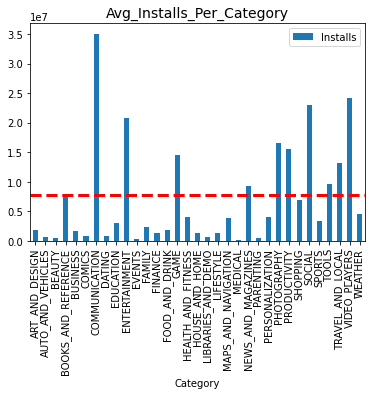

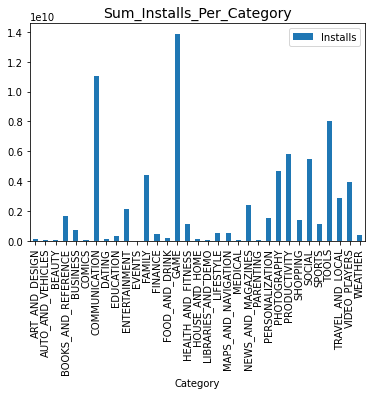

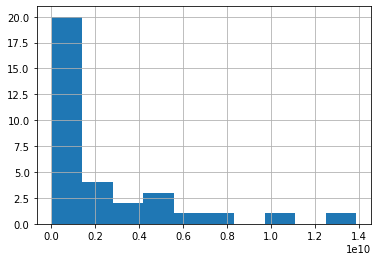

In [3]:
import matplotlib.pyplot as plt
import numpy as np

app_count_table = apps.pivot_table(values='App', 
                       index='Category', 
                       aggfunc=lambda x: len(x.unique())).sort_values('App', ascending=False)
                       ##############################################################################################
app_count_table['% of Total'] = round((app_count_table['App'] / app_count_table['App'].sum() * 100), 2)
print(app_count_table)


table = apps.pivot_table(values='Installs', 
                       index='Category', 
                       aggfunc=np.sum).sort_values('Installs', ascending=False)#.div(sum(index))

#####################################################################################################################
table['% of Total'] = round((table['Installs'] / table['Installs'].sum() * 100), 2)
print(table)


#    Which category has the highest share of (active) apps in the market?
        # I take Install numbers representing share of (active) apps, thus Games has highest share 14.7%
    
#    Is any specific category dominating the market?
        # Yes, Games 18.5%, Communication 14.7%, Tools 10.7%, all others less are than 7.7%

#    Which categories have the fewest number of apps?
        # I take this as count of App group by each categories, so its Beauty

#####################################################################################################################
#####################################################################################################################



#                                                   , aggfunc=np.sum
apps.pivot_table(values='Installs', index='Category').plot(kind='bar')
plt.title('Avg_Installs_Per_Category', fontsize=14)
# use axhline to add Avg line in the bar plot
#####################################################################################################################
plt.axhline(apps['Installs'].mean(), color='red', linestyle='dashed', linewidth=3)
plt.show()


apps.pivot_table(values='Installs', index='Category', aggfunc=np.sum).plot(kind='bar')
plt.title('Sum_Installs_Per_Category', fontsize=14)
plt.show()


                                                      ###############################################################
apps.groupby('Category')['Installs'].sum().hist()     ### Understand what we want and imagine the outcome of code
plt.show()                                            ###############################################################

## 4. Distribution of app ratings

After having witnessed the market share for each category of apps, let's see how all these apps perform on an average. App ratings (on a scale of 1 to 5) impact the discoverability, conversion of apps as well as the company's overall brand image. Ratings are a key performance indicator of an app.

From our research, we found that the average volume of ratings across all app categories is 4.17. The histogram plot is skewed to the right indicating that the majority of the apps are highly rated with only a few exceptions in the low-rated apps.

      Unnamed: 0                                                App  \
4014        4957                                       Adblock Fast   
847         1058                             Capitec Remote Banking   
6267        7312                                Best CG Photography   
459          529  Free Dating App - Meet Local Singles - Flirt Chat   
6078        7122                                             CB Fit   

                Category  Rating  Reviews  Size  Installs  Type  Price  \
4014        PRODUCTIVITY     4.1     9914   3.2   1000000  Free    0.0   
847              FINANCE     4.3    20672   NaN   1000000  Free    0.0   
6267              FAMILY     NaN        1   2.5       500  Free    0.0   
459               DATING     4.1      825   NaN    100000  Free    0.0   
6078  HEALTH_AND_FITNESS     5.0        1   7.8        10  Free    0.0   

     Content Rating            Genres       Last Updated         Current Ver  \
4014       Everyone      Productivity       May 

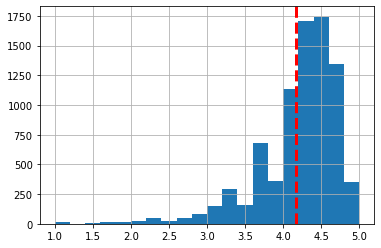

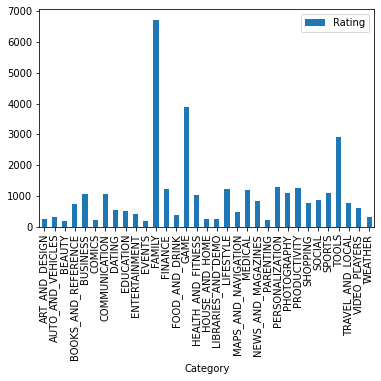

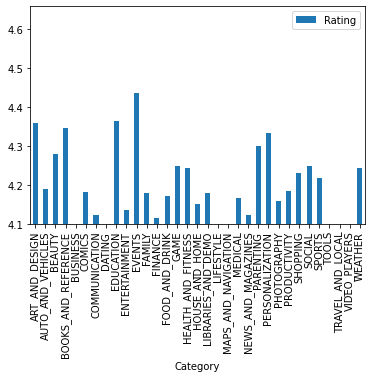

In [4]:
print(apps.sample(5))


print(apps.isna().sum())
print(apps['Rating'].mean())


# How all these apps perform on an average
import matplotlib.pyplot as plt

apps['Rating'].hist(bins=20)
#####################################################################################################################
plt.axvline(apps['Rating'].mean(), color='red', linestyle='dashed', linewidth=3)
plt.show()



# Distribution of apps according to their ratings
# Vertical dashed line to indicate the average app rating




import matplotlib.pyplot as plt
import numpy as np

apps.pivot_table(values='Rating', index='Category', aggfunc=np.sum).plot(kind='bar')
plt.show()


apps.pivot_table(values='Rating', index='Category', aggfunc=np.mean).plot(kind='bar')
plt.ylim(bottom=4.1)
plt.show()

## 5. Size and price of an app

# *******************************************************************************************************************
# *******************************************************************************************************************
Let's now examine app size and app price. For size, if the mobile app is too large, it may be difficult and/or expensive for users to download. Lengthy download times could turn users off before they even experience your mobile app. Plus, each user's device has a finite amount of disk space. For price, some users expect their apps to be free or inexpensive. These problems compound if the developing world is part of your target market; especially due to internet speeds, earning power and exchange rates.

# How can we effectively come up with strategies to size and price our app?

    Does the size of an app affect its rating?
    Do users really care about system-heavy apps or do they prefer light-weighted apps?
    Does the price of an app affect its rating?
    Do users always prefer free apps over paid apps?

# We find that the majority of top rated apps (rating over 4) range from 2 MB to 20 MB. We also find that the vast majority of apps price themselves under $10.

In [5]:
print(apps['Rating'].isna().sum())
print(apps['Size'].isna().sum())
print((apps['Rating'].isna().sum()) | (apps['Size'].isna().sum()))


apps_rating_size = apps[~(apps['Rating'].isna()) & ~(apps['Size'].isna())].copy()

print(len(apps_rating_size))
print('\n')


print(apps_rating_size['Installs'].describe())

1463
1227
1535
7027


count    7.027000e+03
mean     4.468208e+06
std      2.713777e+07
min      1.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64


In [6]:
print(apps['Price'].isna().sum())

0


412
            Installs  % of total
Size_bin                        
(0, 3]     768998245        2.47
(3, 6]    1283329115        4.11
(6, 9]    1681276825        5.39
(9, 12]   2175246230        6.97
(12, 15]  2661385620        8.53
(15, 18]  1653446611        5.30
(18, 21]   741234226        2.38
(21, 24]  1636047430        5.24
(24, 27]  1078998336        3.46
(27, 30]   673025760        2.16
(30, 33]   834199200        2.67
(33, 36]   741449460        2.38
(36, 39]   778796120        2.50
(39, 42]  1283706010        4.12
(42, 45]   567303900        1.82
(45, 48]   750266610        2.41
(48, 51]  1028026610        3.30
(51, 54]  1088352210        3.49
(54, 57]   980041600        3.14
(57, 60]   729438200        2.34
(60, 63]  1303105520        4.18
(63, 66]   157890200        0.51
(66, 69]   624948100        2.00
(69, 72]   904439100        2.90
(72, 75]   891130610        2.86
(75, 78]  1472421100        4.72
(78, 81]   182651000        0.59
(81, 84]   238720510        0.77
(84, 8

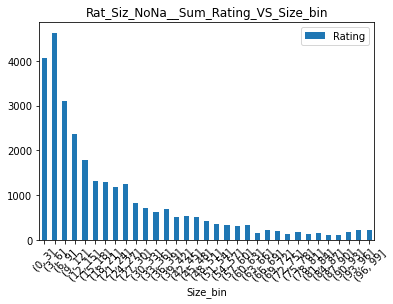

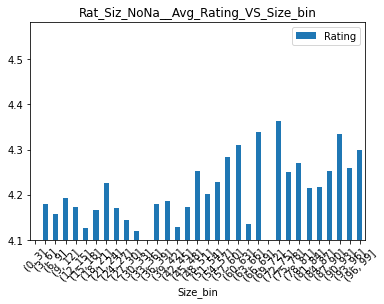

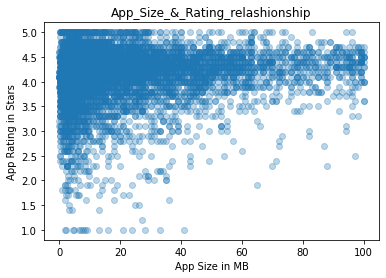

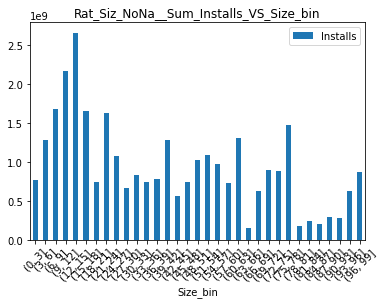

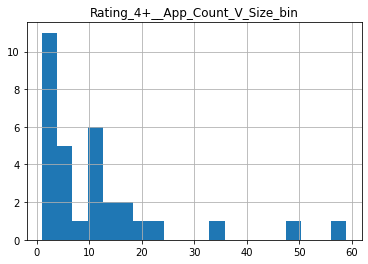

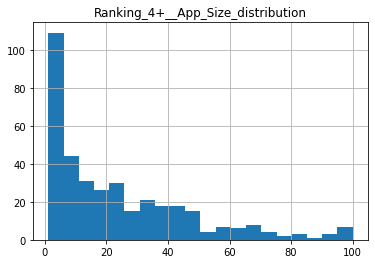

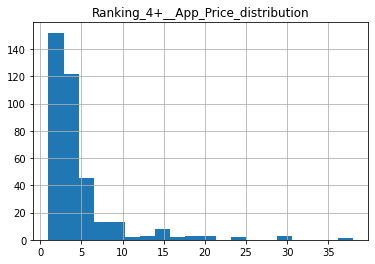

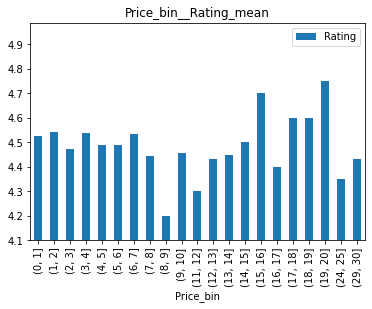

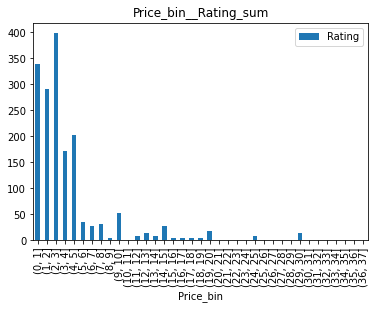

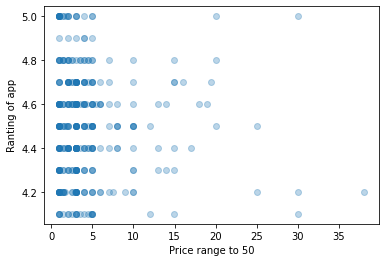

In [6]:
#    Does the size of an app affect its rating?
        # Dont know if I can answer this properly, Size under 15 group seems more popular 
        # - more total Installs, higher total Rating, but on mean isde, it can be hard to explain
    
#    Do users really care about system-heavy apps or do they prefer light-weighted apps?
        # if so, the Rating or Install should be significant diff with Size change, 
        # and yes 10-15 seems really popular
    
#    Does the price of an app affect its rating?
        # same thingas above, just change Size to price, and read the plot
    
#    Do users always prefer free apps over paid apps?
        # same, just group into two, or draw two plot together
    
#####################################################################################################################
#####################################################################################################################

import matplotlib.pyplot as plt

#apps.fillna(0)   # Why fillna?  Does this operation have any influence to our analysis?  Think Why before doing
print(len(apps_rating_size.pivot_table(values='Rating', index='Size', aggfunc=np.sum)))


bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
bins = list(range(0, round(apps_rating_size['Size'].max()), 3))
#####################################################################################################################
apps_rating_size['Size_bin'] = pd.cut(apps_rating_size['Size'], bins)


size_bin_install_table = apps_rating_size.pivot_table(values='Installs', index='Size_bin', aggfunc=np.sum)
size_bin_install_table['% of total'] = round(size_bin_install_table['Installs']/
                                             size_bin_install_table['Installs'].sum()*100, 2)
print(size_bin_install_table)





apps_rating_size.pivot_table(values='Rating', index='Size_bin', aggfunc=np.sum).plot(kind='bar', rot=45)
plt.title('Rat_Siz_NoNa__Sum_Rating_VS_Size_bin')
plt.show()

apps_rating_size.pivot_table(values='Rating', index='Size_bin', aggfunc=np.mean).plot(kind='bar', rot=45)
plt.title('Rat_Siz_NoNa__Avg_Rating_VS_Size_bin')
#####################################################################################################################
plt.ylim(bottom=4.1)
plt.show()



plt.scatter(x=apps_rating_size['Size'], y=apps_rating_size['Rating'], alpha=0.3)
plt.title('App_Size_&_Rating_relashionship')
plt.xlabel('App Size in MB')
plt.ylabel('App Rating in Stars')
#plt.xscale('log')
plt.show()






apps_rating_size.pivot_table(values='Installs', index='Size_bin', aggfunc=np.sum).plot(kind='bar', rot=45)
#####################################################################################################################
plt.title('Rat_Siz_NoNa__Sum_Installs_VS_Size_bin')
plt.show()




over_4_app = apps_rating_size[(apps_rating_size['Rating']>4) & 
                              (apps_rating_size['Size']>1) & 
                              (apps_rating_size['Price']>0) & 
                              (apps_rating_size['Price']<50)].copy()


over_4_app['Good_App_Size_bin'] = pd.cut(over_4_app['Size'].values, range(0, round(over_4_app['Size'].max()), 3))

over_4_app.pivot_table(values='App', index='Good_App_Size_bin', aggfunc=lambda x: len(x.unique())).hist(bins=20)#plot(kind='bar')
plt.title('Rating_4+__App_Count_V_Size_bin')
plt.show()


over_4_app['Size'].hist(bins=20)
plt.title('Ranking_4+__App_Size_distribution')
plt.show()


#print(over_4_app['Price'].describe())
over_4_app['Price'].hist(bins=20)
plt.title('Ranking_4+__App_Price_distribution')
plt.show()





over_4_app['Price_bin'] = pd.cut(over_4_app['Price'], range(0, round(over_4_app['Price'].max()), 1))

over_4_app.pivot_table(values='Rating', index='Price_bin', aggfunc=np.mean).plot(kind='bar')
plt.ylim(bottom=4.1)
plt.title('Price_bin__Rating_mean')
plt.show()


over_4_app.pivot_table(values='Rating', index='Price_bin', aggfunc=np.sum).plot(kind='bar')
plt.title('Price_bin__Rating_sum')
plt.show()



#####################################################################################################################
plt.scatter(x=over_4_app['Price'], y=over_4_app['Rating'], alpha=0.3)
plt.xlabel('Price range to 50')
plt.ylabel('Ranting of app')
#plt.axvline(over_4_app['Price'].median(), color='red', linestyle='dashed', linewidth=3)
plt.show()


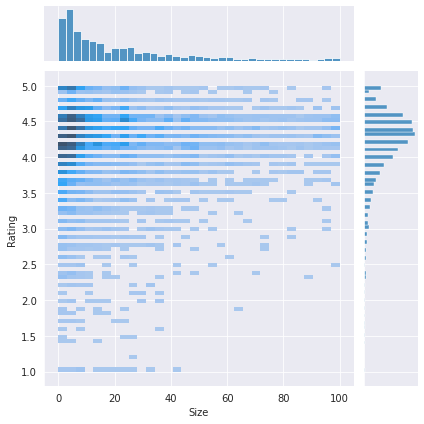

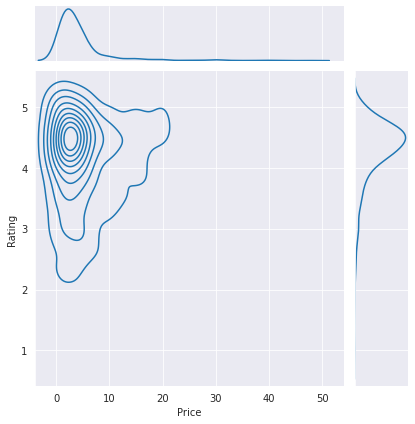

In [7]:
%matplotlib inline
# So we dont need to use plt.show() to display the plots

import seaborn as sns


sns.set_style("darkgrid")



# Subset for categories with at least 250 apps
large_categories = apps.groupby(apps['Category']).filter(lambda x: len(x) >= 250).copy().reset_index()


# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'], kind = 'hist')
#####################################################################################################################




# Subset out apps whose type is 'Paid'
paid_apps = apps[(apps['Type'] == 'Paid') & (apps['Price']<50)].copy()


# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'], kind='kde')

## 6. Relation between app category and app price

# *******************************************************************************************************************
# So now comes the hard part. How are companies and developers supposed to make ends meet? What monetization strategies can companies use to maximize profit? The costs of apps are largely based on features, complexity, and platform.

There are many factors to consider when selecting the right pricing strategy for your mobile app. It is important to consider the willingness of your customer to pay for your app. A wrong price could break the deal before the download even happens. Potential customers could be turned off by what they perceive to be a shocking cost, or they might delete an app they’ve downloaded after receiving too many ads or simply not getting their money's worth.

# Different categories demand different price ranges. 
Some apps that are simple and used daily, like the calculator app, should probably be kept free. However, it would make sense to charge for a highly-specialized medical app that diagnoses diabetic patients. Below, we see that Medical and Family apps are the most expensive. Some medical apps extend even up to $80! All game apps are reasonably priced below $20.

['BUSINESS' 'GAME' 'FAMILY' 'TOOLS']


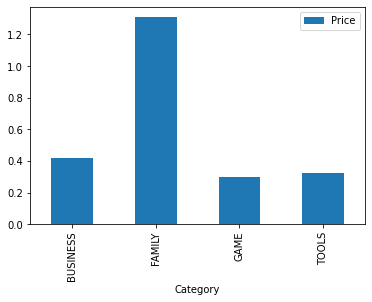

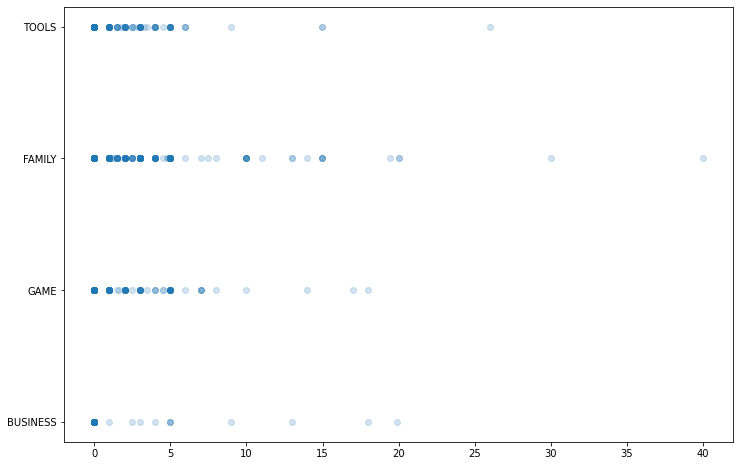

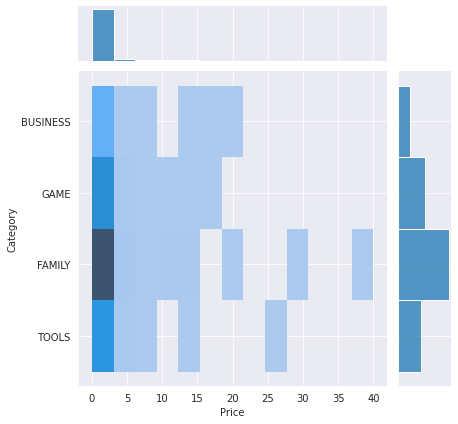

In [7]:
# Subset for categories with at least 250 apps
large_categories = apps.groupby(apps['Category']).filter(lambda x: len(x) >= 400).copy().reset_index()



print(large_categories['Category'].unique())



large_categories.pivot_table(values='Price', index='Category').plot(kind='bar')
plt.show()



large_categories2 = large_categories[large_categories['Price']<40].copy()


plt.figure(figsize=(12,8))
plt.scatter(x=large_categories2['Price'], y=large_categories2['Category'], alpha=0.2)
plt.show()





%matplotlib inline
# So we dont need to use plt.show() to display the plots

import seaborn as sns


sns.set_style("darkgrid")
plt3 = sns.jointplot(x = large_categories2['Price'], y = large_categories2['Category'], kind = 'hist')



#####################################################################################################################
# It cant convince myself, how can I told the story to others? 



## 7. Filter out "junk" apps

# It looks like a bunch of the really expensive apps are "junk" apps. 
# *******************************************************************************************************************
That is, apps that don't really have a purpose. Some app developer may create an app called I Am Rich Premium or most expensive app (H) just for a joke or to test their app development skills. Some developers even do this with malicious intent and try to make money by hoping people accidentally click purchase on their app in the store.

Let's filter out these junk apps and re-do our visualization. The distribution of apps under $20 becomes clearer.

In [18]:
apps['Hello'] = apps.groupby('Category')['Price'].quantile(0.97)
print(apps.groupby('Category')['Price'].quantile(0.97))


apps['World'] = apps.groupby('Category')['Price'].apply(lambda x: x.quantile(0.97))
print(apps.groupby('Category')['Price'].apply(lambda x: x.quantile(0.97)))


apps['Bonjour'] = apps.groupby('Category')['Price'].transform(lambda x: x.quantile(0.97))
print(apps.groupby('Category')['Price'].transform(lambda x: x.quantile(0.97)))


print(apps.sample(7))

Category
ART_AND_DESIGN          1.9900
AUTO_AND_VEHICLES       0.7152
BEAUTY                  0.0000
BOOKS_AND_REFERENCE     5.9900
BUSINESS                0.0000
COMICS                  0.0000
COMMUNICATION           2.9900
DATING                  1.3410
EDUCATION               1.8354
ENTERTAINMENT           0.0000
EVENTS                  0.0000
FAMILY                  3.9900
FINANCE                 5.6700
FOOD_AND_DRINK          0.0000
GAME                    3.6200
HEALTH_AND_FITNESS      2.9900
HOUSE_AND_HOME          0.0000
LIBRARIES_AND_DEMO      0.0000
LIFESTYLE               3.9520
MAPS_AND_NAVIGATION     0.9900
MEDICAL                16.1700
NEWS_AND_MAGAZINES      0.0000
PARENTING               1.0557
PERSONALIZATION         2.4900
PHOTOGRAPHY             3.7660
PRODUCTIVITY            2.9900
SHOPPING                0.0000
SOCIAL                  0.0000
SPORTS                  2.9984
TOOLS                   3.5802
TRAVEL_AND_LOCAL        2.7578
VIDEO_PLAYERS           0.0000

In [39]:


print(apps.pivot_table(values='Price', index='Category', 
                       aggfunc=[np.min, np.mean, lambda x: x.quantile(0.97), np.max]))


#super_expansive = apps[apps['Price'] 
#                       < apps.pivot_table(values='Price', 
#                                          index='Category', 
#                                          aggfunc=lambda x: x.quantile(0.97))].copy()



# ***************************************************************************************************************** #
#                    ### Filter should be same length, as the process can be think as apply if check to each item
#
#super_expansive = apps[apps['Price'] < 
#                       apps.groupby('Category')['Price'].apply(lambda x: x.quantile(0.97))].copy()




# ***************************************************************************************************************** #
#
#super_expansive = apps[apps['Price'] < 
#                       apps.groupby('Category')['Price'].quantile(0.97)].copy()
#                   ### This will return a len('Category') long series, contain quantile(0.97) of each



#                  < apps.pivot_table(values='Price', index='Category').filter(apps['Price'].quantile(0.97))].copy()





# ***************************************************************************************************************** #
# Similar of 2ed and 3rd quantile, .groupby() then .transform() to apply lambda func to grouped values
#
# df_final['1st quartile'] = (df_final.groupby('Cat')['CTR']
#                                     .transform(lambda x: x.quantile(0.25))
#                                     .round(2))





# ***************************************************************************************************************** #

super_expansive = apps[apps['Price'] 
                       <= apps.groupby('Category')['Price'].transform(lambda x: x.quantile(0.97))].copy()

# ***************************************************************************************************************** #






print(super_expansive.pivot_table(values='Price', index='Category', aggfunc=[min, np.mean, max]))



#####################################################################################################################
#
# In all the Categories, 97% of apps Price are under 15$


print(apps[apps['Price'] > apps.groupby('Category')['Price'].transform(lambda x: x.quantile(0.97))].copy())


                     amin      mean <lambda>    amax
                    Price     Price    Price   Price
Category                                            
ART_AND_DESIGN        0.0  0.093281   1.9900    1.99
AUTO_AND_VEHICLES     0.0  0.158471   0.7152    9.99
BEAUTY                0.0  0.000000   0.0000    0.00
BOOKS_AND_REFERENCE   0.0  0.539505   5.9900    6.49
BUSINESS              0.0  0.417357   0.0000   89.99
COMICS                0.0  0.000000   0.0000    0.00
COMMUNICATION         0.0  0.263937   2.9900   19.99
DATING                0.0  0.160468   1.3410    7.99
EDUCATION             0.0  0.150924   1.8354    5.99
ENTERTAINMENT         0.0  0.078235   0.0000    4.99
EVENTS                0.0  1.718594   0.0000  109.99
FAMILY                0.0  1.309967   3.9900  399.99
FINANCE               0.0  8.408203   5.6700  399.99
FOOD_AND_DRINK        0.0  0.075714   0.0000    4.99
GAME                  0.0  0.296465   3.6200   17.99
HEALTH_AND_FITNESS    0.0  0.223438   2.9900  

In [36]:
super_expansive = apps[apps['Price'] < apps.pivot_table(values='Price', 
                                                        index='Category', 
                                                        aggfunc=lambda x: x.quantile(0.97))].copy()


print(apps.pivot_table(values='Price', index='Category', aggfunc=lambda x: x.quantile(0.97)))



print(apps.groupby('Category')['Price'].transform(lambda x: x.quantile(0.97)))


/tmp/ipykernel_2000/628046479.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  super_expansive = apps[apps['Price'] < apps.pivot_table(values='Price',


                       Price
Category                    
ART_AND_DESIGN        1.9900
AUTO_AND_VEHICLES     0.7152
BEAUTY                0.0000
BOOKS_AND_REFERENCE   5.9900
BUSINESS              0.0000
COMICS                0.0000
COMMUNICATION         2.9900
DATING                1.3410
EDUCATION             1.8354
ENTERTAINMENT         0.0000
EVENTS                0.0000
FAMILY                3.9900
FINANCE               5.6700
FOOD_AND_DRINK        0.0000
GAME                  3.6200
HEALTH_AND_FITNESS    2.9900
HOUSE_AND_HOME        0.0000
LIBRARIES_AND_DEMO    0.0000
LIFESTYLE             3.9520
MAPS_AND_NAVIGATION   0.9900
MEDICAL              16.1700
NEWS_AND_MAGAZINES    0.0000
PARENTING             1.0557
PERSONALIZATION       2.4900
PHOTOGRAPHY           3.7660
PRODUCTIVITY          2.9900
SHOPPING              0.0000
SOCIAL                0.0000
SPORTS                2.9984
TOOLS                 3.5802
TRAVEL_AND_LOCAL      2.7578
VIDEO_PLAYERS         0.0000
WEATHER       

In [28]:
import pandas as pd
df = pd.read_csv('tips.csv')
print(df.sample(5))
print(df.groupby('day')['total_bill'].mean())

print(df.groupby("day").filter(lambda x: x['total_bill'].mean() > 20).day.unique())
print('\n')
#df.groupby('day').apply(lambda x: x['total_bill'] > x['total_bill'].mean())


grouped = (df.groupby('day')
           .apply(lambda x: x['total_bill'] > x['total_bill'].mean())
           .reset_index())

index_bill = (grouped.loc[grouped.total_bill == True, 'level_1'].values)

print(df.loc[index_bill])



#####################################################################################################################
'''
https://stackoverflow.com/questions/49031359/pandas-filtering-rows-by-group-value
'''

print(df[df.groupby('day')['total_bill']
         .transform(lambda x: x.quantile(0.95)) < df['total_bill']])

     total_bill   tip     sex smoker   day    time  size
93        16.32  4.30  Female    Yes   Fri  Dinner     2
187       30.46  2.00    Male    Yes   Sun  Dinner     5
4         24.59  3.61  Female     No   Sun  Dinner     4
204       20.53  4.00    Male    Yes  Thur   Lunch     4
38        18.69  2.31    Male     No   Sat  Dinner     3
day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64
['Sun' 'Sat']


     total_bill   tip     sex smoker   day    time  size
90        28.97  3.00    Male    Yes   Fri  Dinner     2
91        22.49  3.50    Male     No   Fri  Dinner     2
94        22.75  3.25  Female     No   Fri  Dinner     2
95        40.17  4.73    Male    Yes   Fri  Dinner     4
96        27.28  4.00    Male    Yes   Fri  Dinner     2
..          ...   ...     ...    ...   ...     ...   ...
192       28.44  2.56    Male    Yes  Thur   Lunch     2
197       43.11  5.00  Female    Yes  Thur   Lunch     4
200       18.71  4.0

## 8. Popularity of paid apps vs free apps

For apps in the Play Store today, there are five types of pricing strategies: free, freemium, paid, paymium, and subscription. Let's focus on free and paid apps only. Some characteristics of free apps are:

    Free to download.
    Main source of income often comes from advertisements.
    Often created by companies that have other products and the app serves as an extension of those products.
    Can serve as a tool for customer retention, communication, and customer service.

Some characteristics of paid apps are:

    Users are asked to pay once for the app to download and use it.
    The user can't really get a feel for the app before buying it.

Are paid apps are installed as much as free apps? It turns out that paid apps have a relatively lower number of installs than free apps, though the difference is not as stark as I would have expected!